In [79]:
import numpy as np
import pandas as pd
from astropy.constants import M_sun
import matplotlib.pyplot as plt

plot = True
save = False
mass = 1.0

In [80]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 20
plt.rc('font', family='Times New Roman')

In [81]:
nx = 100          # number of radial zones
KE = 1.7e51       # KE in erg
texp = 86400      # secs

ve = (KE / (6 * mass * M_sun.value * 10**3))**0.5                           # cm/s
rho_0 = (mass * M_sun.value * 10**3) / (8 * np.pi * (ve * texp)**3.0)       # gm/cm^3

v_max = 4.0e9     # outer velocity (cm/s)
dv = v_max / (1.0 * nx)

rho = np.zeros(nx)
v = np.zeros(nx)

for i in range(nx):
    
    v[i] = (i + 1.0) * dv
    vm = (i + 0.5) * dv
    
    rho[i] = rho_0 * np.exp(-vm / ve)

In [82]:
model_df = pd.DataFrame({'velocity': v, 'density': rho})

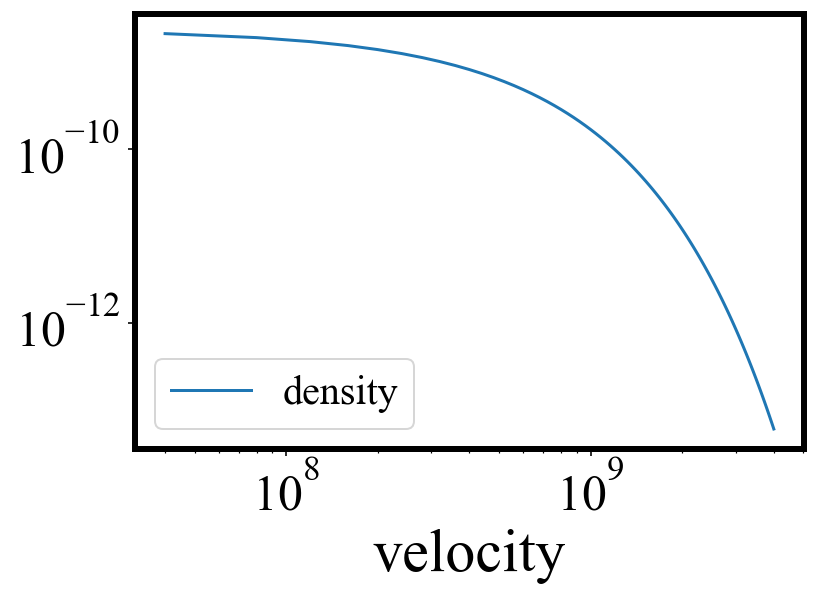

In [83]:
model_df.plot('velocity', 'density')
plt.yscale("log")
plt.xscale("log")

plt.show();

In [84]:
if save:
    model_df.to_csv('/Users/anirbandutta/Documents/SNEXP/Violent_Merger_2012_Model_Ejecta/' + 'model_' + str(mass) + '_' + 
                 str(KE), sep='\t')